# **K-Nearest Neighbors**

In this exercise, you will build a classifier using the K-Nearest Neighbors algorithm.

---

### **1. Generating data**

You will start by generating synthetic data for this problem.  

- Generate a dataset with **n = 50 points** in a unit square. Each point should have an assigned label: orange or blue.  
  - Think about the rules to assign the labels (hint: you need a boundary rule to classify points as orange or blue).  
  - Store the x and y coordinates, along with the label, in a structured format.  
  - Vizualize the dataset.

---

### **2. The algorithm**

You will now use your generated dataset to determine the label of a new observation **(x₀, y₀)**. Here are the steps you should follow :

- Compute the distances between **(x₀, y₀)** and all points in your dataset.  
  - How will you calculate the distance ? 
  - What type of distance metric can you use ?  

- Select a value for **K**

- Identify the **K nearest neighbors** for your new point based on the distances you computed.  

- Based on the labels of the nearest neighbors, how would you decide the predicted class for the new observation ? Do it and explain your approach.

- Experiment with different values of **K** :  
  - Analyze how the prediction changes depending on different values for **K**.  
  - What happens when **K** is too small ? Too large ?

---

### **3. More complex dataset**

- Implement the K-Nearest Neighbors algorithm for datasets with more complicated shapes (generate these data, you can use your creativity).  
  - What happens to your prediction as the dataset structure becomes more complex ?

- Test your implementation by generating a random test set with new points. Measure how well your algorithm performs (e.g., accuracy, precision, recall).  

- Try using a different distance metric (e.g., Manhattan distance) to see how it impacts classification. Which metric feels more appropriate for your specific problem ?

---



### Task 1

In [2]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

data = np.random.rand(50,2) # random points on x-y 2D plane
data[:10]

array([[0.45993516, 0.26077125],
       [0.29609502, 0.06984591],
       [0.66291088, 0.07165703],
       [0.07778036, 0.65996939],
       [0.98872542, 0.64112097],
       [0.45646613, 0.81780582],
       [0.09909444, 0.41034446],
       [0.073273  , 0.91837015],
       [0.60926893, 0.95533439],
       [0.57197557, 0.4704854 ]])

In [3]:
def identify_color(point): 
    '''
    Function that separates points into 2 different color classes
    based on an arbitrary condition

    x > 0.7 or y < 0.3 => orange
    else => blue
    '''
    if point[0] > 0.7 or point[1] <0.3:
        return 'orange'
    return 'blue'

df = pd.DataFrame(data, columns=['x', 'y']) # gather points into a dataframe
df = df.join(pd.Series(map(identify_color, data), name='label'))  # add the labels to the df
df.head(5)

,x,y,label
0,0.459935,0.260771,orange
1,0.296095,0.069846,orange
2,0.662911,0.071657,orange
3,0.077780,0.659969,blue
4,0.988725,0.641121,orange


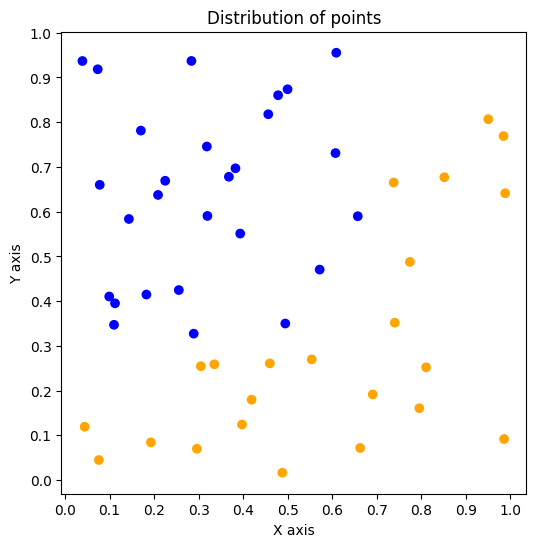

In [4]:
col = np.where(df.x>0.7,'orange',np.where(df.y<0.3,'orange', 'blue')) # a conditional color assignment

plt.figure(figsize=(6,6))
plt.scatter(df.x, df.y, c=col) # visualization of the points
plt.title('Distribution of points')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

### Task 2

In [5]:
new_point = np.random.rand(2) # generating a random point (x,y) to test the KNN
new_point

array([0.77672376, 0.23382714])

In [6]:
def calculate_distances(point: np.array, other_points: np.array) -> np.array:
    '''
    Function to calculate distance from 1 point to all other points

    Uses **Euclidean** distance metric

    Args
        `point: np.array` -  the point to calculate distances to
        `other_points : np.array` - other points ~

    Returns
        `distances: np.array` - array of distances from `point` to each
        one of the `other_points`
    '''
    distances = list()
    i = 0
    for p_i in other_points:
        dist = np.sqrt(np.pow(point[0] - p_i[0], 2) + np.pow(point[1] - p_i[1], 2))
        distances.append([i, dist])
        i += 1

    return np.array(distances)

distances = calculate_distances(new_point, data)
distances[:5]

array([[0.        , 0.31793239],
       [1.        , 0.50783249],
       [2.        , 0.19812247],
       [3.        , 0.81860803],
       [4.        , 0.45916552]])

In my case, I used the Euclidian distance metric for my calculations.

>Euclidean Distance – This distance is the most widely used one as it is the default metric that SKlearn library of Python uses for K-Nearest Neighbour. It is a measure of the true straight line distance between two points in Euclidean space.


Let $K$ be 3, for this example

In [7]:
k = 3

sorted_distances = distances[distances[:, 1].argsort()] # sort the distances
print('Sorted distances: \n', sorted_distances[:10])
print('...')
print('K (3) nearest neighbors: \n', sorted_distances[:3])

Sorted distances: 
 [[1.50000000e+01 3.89183220e-02]
 [2.40000000e+01 7.56896127e-02]
 [4.00000000e+01 9.54318847e-02]
 [1.20000000e+01 1.23272398e-01]
 [2.00000000e+00 1.98122474e-01]
 [3.30000000e+01 2.25413652e-01]
 [1.70000000e+01 2.53311708e-01]
 [3.10000000e+01 2.53813634e-01]
 [3.70000000e+01 3.04971512e-01]
 [9.00000000e+00 3.12936028e-01]]
...
K (3) nearest neighbors: 
 [[1.50000000e+01 3.89183220e-02]
 [2.40000000e+01 7.56896127e-02]
 [4.00000000e+01 9.54318847e-02]]


In [8]:
knn_indices = sorted_distances[:, 0][:3]
knn_indices = list(map(lambda x: int(x), knn_indices))
knn_indices # positions of the k nearest neighbors in the df

[15, 24, 40]

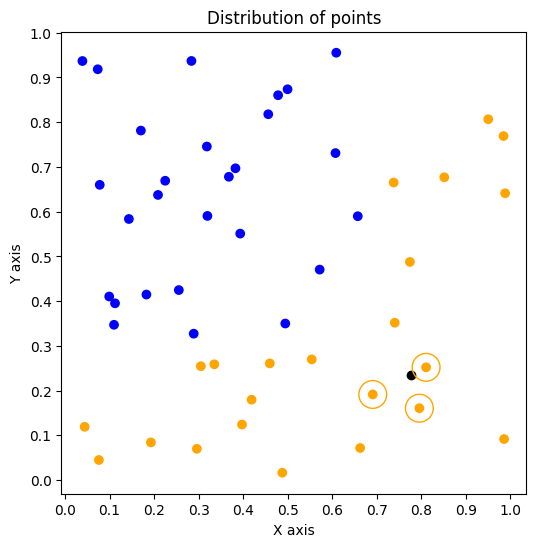

In [9]:
col = np.where(
    df.x>0.7,
    'orange',
    np.where(df.y<0.3,'orange', 'blue')
) # conditional colors for the points

knn_col = np.where( # conditional color for the neighbors
    df.loc[knn_indices].x>0.7,
    'orange',
    np.where(df.loc[knn_indices].y<0.3,'orange', 'blue')
)

plt.figure(figsize=(6,6))
plt.scatter(df.x, df.y, c=col) # scatter all points
plt.scatter(new_point[0], new_point[1], c='black') # scatter our main point
plt.scatter(df.loc[knn_indices].x, df.loc[knn_indices].y, 
            edgecolors=knn_col, s=400, facecolors='none') # scatter the neighbors
plt.title('Distribution of points')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

For this case, it is clear that our point - the black point - is of class orange as all of its k (3) nearest neighbord are of the orange color
 
The classification rule will be as follows: the class of the point is the class of the majority of its $k$ nearest neighbors

In [10]:
class KNN:
    def __init__(self, k):
        self.k = k
        self.data = None
        self.df = None

    def __calculate_distances(self, point):
        '''
        Method to calculate distance from 1 point to all other points

        Uses **Euclidean** distance metric

        Args
            `point: np.array` -  the point to calculate distances to

        Returns
            `distances: np.array` - array of distances from `point` to each
            one of the `other_points`
        '''
        distances = list()
        i = 0
        for p_i in self.data:
            dist = np.sqrt(np.pow(point[0] - p_i[0], 2) + np.pow(point[1] - p_i[1], 2))
            distances.append([i, dist])
            i += 1

        distances =  np.array(distances)
        return distances[distances[:, 1].argsort()]

    def fit(self, df: pd.DataFrame):
        '''
        Method to save the training dataframe 
        '''
        self.df = df
        self.data = np.array(df[['x', 'y']])

    def __get_knn_indices(self, point):
        '''
        Method to get indices of K nearest neighbors
        in the `df`
        '''
        nn = self.__calculate_distances(point)
        knn_indices = nn[:, 0][:self.k]
        knn_indices = list(map(lambda x: int(x), knn_indices))
        return knn_indices

    def predict(self, point):
        '''
        Method to return the predicted label for a point

        May return value in the format `class_1 or class_2`
        if the number of class_1 and class_2 points in the knn
        is the same.
        '''
        knn_indices = self.__get_knn_indices(point)

        labels = self.df.loc[knn_indices]['label'].value_counts().sort_index()
        label_index = labels[labels == labels.max()].index
        label = ''
        if len(label_index) > 1:
            label = ' or '.join(label_index)
        else:
            label = str(label_index[0])
        return label
    
    def visualize(self, point):
        '''
        Method to visualize the distibution of points, knn, 
        and the point to classify
        '''
        knn_indices = self.__get_knn_indices(point)

        col = np.where(
            self.df.label=='orange',
            'orange',
            'blue'
        )

        knn_col = np.where(
            self.df.loc[knn_indices].label=='orange',
            'orange',
            'blue'
        )

        plt.figure(figsize=(6,6))
        plt.scatter(self.df.x, self.df.y, c=col)
        plt.scatter(point[0], point[1], c='black')
        plt.scatter(self.df.loc[knn_indices].x, self.df.loc[knn_indices].y, edgecolors=knn_col, s=400, facecolors='none')
        plt.title('Distribution of points')
        plt.xticks(np.arange(0, 1.1, 0.1))
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.show()



In [11]:
knn = KNN(k) # create a knn instance

knn.fit(df)
knn.predict(new_point)

'orange'

#### Testing with different points and $K$

In [79]:
new_point2 = np.random.rand(2)
knn_4 = KNN(k=4)
knn_4.fit(df)
knn_4.predict(new_point2)

'orange'

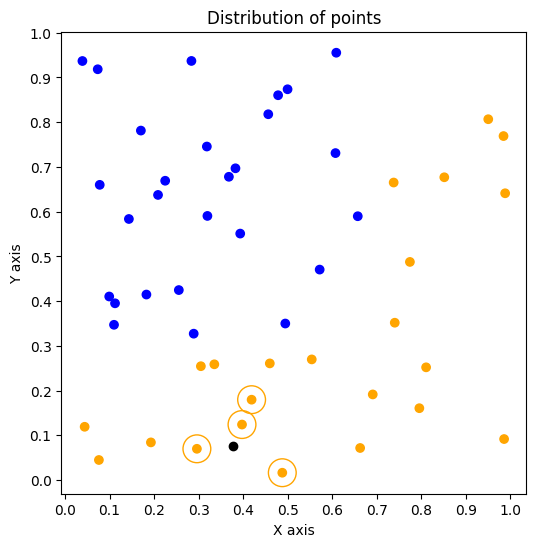

In [80]:
knn_4.visualize(new_point2)

In [81]:
knn_5 = KNN(5)
knn_5.fit(df)
knn_5.predict(new_point2)

'orange'

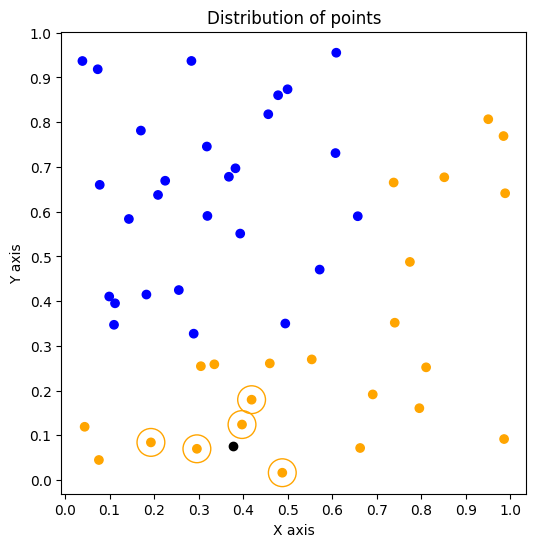

In [82]:
knn_5.visualize(new_point2)

In [83]:
knn_1 = KNN(1)
knn_1.fit(df)
knn_1.predict(new_point2)
knn_1.predict(new_point2)

'orange'

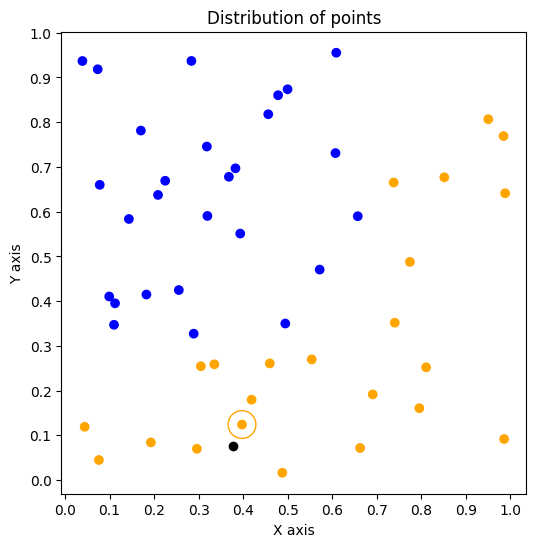

In [84]:
knn_1.visualize(new_point2)

Prediction:  orange


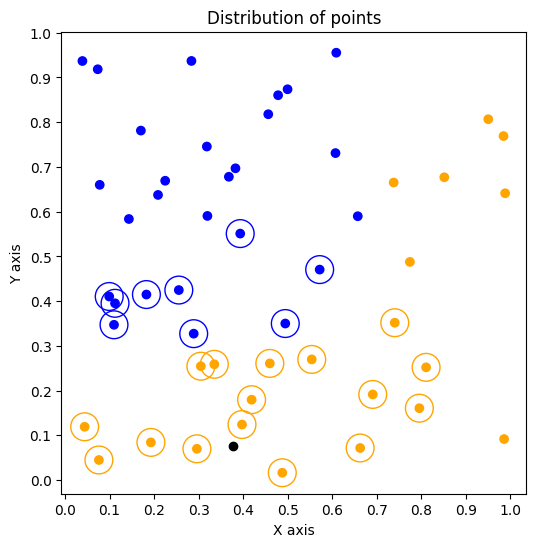

In [85]:
knn_25 = KNN(25)
knn_25.fit(df)
print('Prediction: ', knn_25.predict(new_point2))
knn_25.visualize(new_point2)

Prediction:  blue


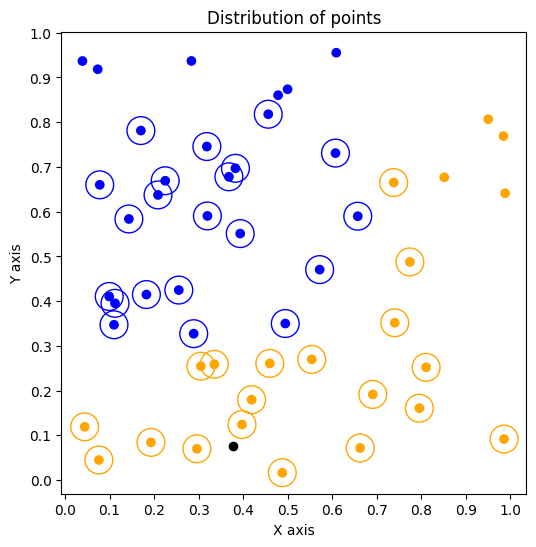

In [86]:
knn_40 = KNN(40)
knn_40.fit(df)
print('Prediction: ', knn_40.predict(new_point2))
knn_40.visualize(new_point2)

The results depend on the value of $k$. Because the decision boundaries become smoother as $k$ grows

As we can see
- Small K values make model highly sensitive to noise and might cause overfitting bias
- Large K values  make model smooth out decision boundary leading to underfitting. As a result, the classifier analyzes the entire population instead of the data points in the vicinity.

### Task3

In [20]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_classes=3, 
                           n_features=3, n_informative=3, 
                           n_redundant=0, random_state=42) #generate a random classification problem

print(X[:100])
X.shape

[[ 1.10230671  0.63878456 -0.05420891]
 [ 0.57116611  2.32382493  1.06754939]
 [ 1.78632411  1.77311661  2.44587232]
 [-3.32908334 -3.9012766   2.01857769]
 [ 1.91421821 -1.78638135 -3.62565449]
 [ 0.31856406 -1.66235841 -1.63237298]
 [-2.64325396  1.93070679 -3.02708024]
 [ 2.08413359 -1.43011637 -2.96465858]
 [-1.35119799  1.49622555 -1.13628697]
 [ 0.76096937 -0.59943234 -1.36532365]
 [-1.66170816  1.31712858 -1.94266391]
 [ 0.55216414  0.93063734  0.12077499]
 [ 0.48589537 -0.78319916  0.0878746 ]
 [-0.12209577  1.89629534  1.20713348]
 [ 0.8862611   0.69380827  0.73798846]
 [-2.3052937  -0.95935074  0.1013833 ]
 [-1.28090803 -0.79249301  0.65457915]
 [ 1.44241093  0.8564894   0.7702071 ]
 [ 0.08214393  1.39273244  1.97766713]
 [-1.98425355  2.97315326 -0.256328  ]
 [-1.6942364  -0.85261923 -0.97589065]
 [-1.22391542  1.21752387 -1.43180822]
 [ 0.01870287 -0.94601923 -1.42579686]
 [ 1.09965615  0.55322796  1.01198274]
 [ 1.51496478  0.85398782 -0.40068311]
 [-0.06765845  1.9595785 

(500, 3)

In [21]:
y

array([0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2,
       2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 0, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0,
       1, 2, 1, 1, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1,
       0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0,
       2, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1,
       2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1,
       1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1,

In [22]:
def color(label): # utility function for color assignment
    if label == 0:
        return 'orange'
    elif label == 1:
        return 'blue'
    else:
        return 'green'

complex_df = pd.DataFrame(X, columns=[axis for axis in ('x', 'y', 'z')])
complex_df['label'] = y
complex_df.label = complex_df.label.map(color)

complex_df.head(5)

,x,y,z,label
0,1.102307,0.638785,-0.054209,orange
1,0.571166,2.323825,1.067549,orange
2,1.786324,1.773117,2.445872,orange
3,-3.329083,-3.901277,2.018578,orange
4,1.914218,-1.786381,-3.625654,blue


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # split the df into train and test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(350, 3) (150, 3) (350,) (150,)


In [87]:
from collections import Counter

class Knn3D:
    '''
    K-Nearest Neighbors classifier for 3D point classification.
    '''
    def __init__(self, k):
        '''
        Instantiate the KNN classifier with a given number 
        of neighbors (k)
        '''
        self.k = k
        self.X = None
        self.y = None

    def __calculate_distances(self, point):
        '''
        Compute Euclidean distances from 1 point to all 
        other points

        Uses **Euclidean** distance metric

        Args
            `point: np.array` -  the point to calculate 
            distances to

        Returns
            `distances: np.array` - array of distances from 
            `point` to each one of the `other_points`
        '''
        distances = list()
        i = 0
        for p_i in self.X:
            dist = np.sqrt(
                np.pow(point[0] - p_i[0], 2) + 
                np.pow(point[1] - p_i[1], 2) + 
                np.pow(point[2] - p_i[2], 2)
            )
            distances.append([i, dist])
            i += 1

        distances =  np.array(distances)
        return distances[distances[:, 1].argsort()]

    def fit(self, X: np.array, y: np.array):
        '''
        Store the training data
        '''
        self.X = X
        self.y = y

    def __get_knn_indices(self, point):
        '''
        Get indices of k-nearest neighbors in the training data 
        for a given point
        '''
        nn = self.__calculate_distances(point)
        knn_indices = nn[:, 0][:self.k]
        knn_indices = list(map(lambda x: int(x), knn_indices))
        return knn_indices

    def predict(self, point):
        '''
        Predict the class label for a given 3D point based on 
        majority voting
        '''
        knn_indices = self.__get_knn_indices(point)

        labels_frequencies = self.y[knn_indices]
        counter = Counter(labels_frequencies)

        most_common_labels = [
            str(key) for key, val in counter.items() 
            if val == max(counter.values())
        ]

        label = ''
        label = most_common_labels[0]
        return label
    
    def test_predict(self, X_test):
        '''
        Predict labels for multiple test points and store 
        the result in a `numpy.array`
        '''
        return np.array([int(self.predict(x)) for x in X_test])
    
    def visualize(self, point):
        '''
        Visualize the 3D data points, highlighting the given point 
        and its neighbors.
        '''
        knn_indices = self.__get_knn_indices(point)

        # Assign colors based on class labels
        col = np.where(
            self.y==0,
            'orange',
            np.where(
                self.y==1,
                'blue',
                'green'
            )
        )

        knn_col = np.where(
            self.y[knn_indices]==0,
            'orange',
            np.where(
                self.y[knn_indices]==1,
                'blue',
                'green'
            )
        )

        # Create 3D scatter plot
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111, projection='3d')

        sc = ax.scatter(self.X[:, 0], 
                        self.X[:, 1], 
                        self.X[:, 2], 
                        c=col)
        
        point_plot = ax.scatter(point[0], point[1], point[2], 
                                c='black')
        neighbors = ax.scatter(self.X[knn_indices][:, 0], 
                               self.X[knn_indices][:, 1],
                               self.X[knn_indices][:, 2],
                               edgecolors=knn_col, s=400, 
                               facecolors='none')

        ax.set_xlabel("X axis")
        ax.set_ylabel("Y axis")
        ax.set_zlabel("Z axis")
        ax.set_title("3D Scatter Plot")

        plt.show()

In [88]:
complex_knn = Knn3D(5) # instantiate the 3d classifier
complex_knn.fit(X_train, y_train)

new_3d_point = np.random.rand(3)
print(new_3d_point) # predictions on a random point

complex_knn.predict(new_3d_point)

[0.91154915 0.89429293 0.53495727]


'0'

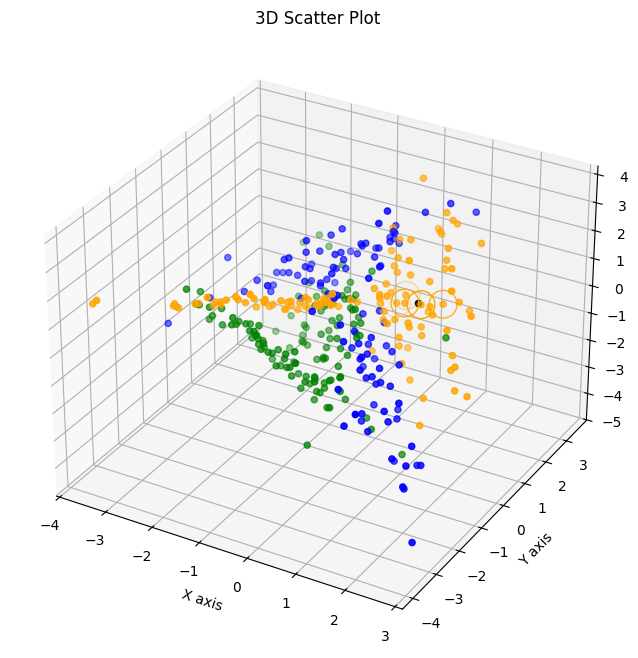

In [89]:
complex_knn.visualize(new_3d_point) # visualize the result

In [90]:
y_test

array([1, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1,
       1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2,
       2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 1,
       1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2])

In [91]:
# Make predictions on test data
y_pred = complex_knn.test_predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0,
       0, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1,
       0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2,
       2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 1,
       1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0])

In [92]:
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report
)

In [94]:
labels = ['orange', 'blue', 'green']

def evauluate_metrics(test, pred):
    '''
    Compute and print to stdout classification metrics
    such as 
    - Accuracy
    - Per class accuracy
    - Macro averaged 
        - precision
        - recall
        - f1-score
    - Weighted averaged
        - precision
        - recall
        - f1-score
    '''
    acc = accuracy_score(test, pred)
    precision, recall, f1, _ = precision_recall_fscore_support(test, pred, average=None)  
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(test, pred, average='macro')
    weighted_precision, weighted_recall, weighted_f1, _ = precision_recall_fscore_support(test, pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print("For each class: ")
    for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
        print(f"Class {i} - {labels[i]}: Precision={p:.4f}, Recall={r:.4f}, F1-Score={f:.4f}")

    print("\nMacro averaged metrics:")
    print(f"Precision: {macro_precision:.4f}, Recall: {macro_recall:.4f}, F1-Score: {macro_f1:.4f}")

    print("\nWeighted averaged metrics:")
    print(f"Precision: {weighted_precision:.4f}, Recall: {weighted_recall:.4f}, F1-Score: {weighted_f1:.4f}")

evauluate_metrics(y_test, y_pred)

Accuracy: 0.8133
For each class: 
Class 0 - orange: Precision=0.7170, Recall=0.7917, F1-Score=0.7525
Class 1 - blue: Precision=0.8462, Recall=0.7719, F1-Score=0.8073
Class 2 - green: Precision=0.8889, Recall=0.8889, F1-Score=0.8889

Macro averaged metrics:
Precision: 0.8173, Recall: 0.8175, F1-Score: 0.8162

Weighted averaged metrics:
Precision: 0.8176, Recall: 0.8133, F1-Score: 0.8142


In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        48
           1       0.85      0.77      0.81        57
           2       0.89      0.89      0.89        45

    accuracy                           0.81       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.81      0.81       150



#### Observations
We can see that the model performed pretty well on the testing set. The f1-score is around 0.8, which indicates that we have a rather good balance of identifying correct classes and doing it accurately.

As for the class-specific predictions, our model was very good at accurately identifying green points (class 2). Around 90% of green predictions were on point.

The total accuracy of this model is 0.81 - and the same is for weighted average metrics.

(Note: I tested this model with different randomly generated datasets and the results do not deviate from the obeservations recorded here)

In general, the model performs well on the training dataset. Further testing (cross-validation perhaps) would help us to describe the quality of the model

In [96]:
class ManhattanKnn3D(Knn3D):
    def __init__(self, k):
        super().__init__(k)

    def __calculate_distances(self, point):
        distances = list()
        i = 0
        for p_i in self.X:
            dist = sum(abs(point[j]-p_i[j]) for j in range(3))
            distances.append([i, dist])
            i += 1

        distances =  np.array(distances)
        return distances[distances[:, 1].argsort()]

    def __get_knn_indices(self, point):
        nn = self.__calculate_distances(point)
        knn_indices = nn[:, 0][:self.k]
        knn_indices = list(map(lambda x: int(x), knn_indices))
        return knn_indices
    
    
    def predict(self, point):
        knn_indices = self.__get_knn_indices(point)

        labels_frequencies = self.y[knn_indices]
        counter = Counter(labels_frequencies)

        most_common_labels = [
            str(key) for key, val in counter.items() 
            if val == max(counter.values())
        ]

        label = ''
        label = most_common_labels[0]
        return label

# For some reason, OOP did not work - so I had to break the DRY rule :sad:

In [97]:
complex_mh_knn = ManhattanKnn3D(5)
complex_mh_knn.fit(X_train, y_train)

new_3d_point = np.random.rand(3)
print(new_3d_point)

complex_knn.predict(new_3d_point)

[0.11876574 0.5397107  0.69169612]


'0'

In [98]:
y_mh_pred = complex_mh_knn.test_predict(X_test)
y_mh_pred

array([0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0,
       0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1,
       0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2,
       2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1,
       0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0])

In [99]:
evauluate_metrics(y_test, y_mh_pred)

Accuracy: 0.8200
For each class: 
Class 0 - orange: Precision=0.7255, Recall=0.7708, F1-Score=0.7475
Class 1 - blue: Precision=0.8364, Recall=0.8070, F1-Score=0.8214
Class 2 - green: Precision=0.9091, Recall=0.8889, F1-Score=0.8989

Macro averaged metrics:
Precision: 0.8236, Recall: 0.8222, F1-Score: 0.8226

Weighted averaged metrics:
Precision: 0.8227, Recall: 0.8200, F1-Score: 0.8210


In [100]:
print(classification_report(y_test, y_mh_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        48
           1       0.84      0.81      0.82        57
           2       0.91      0.89      0.90        45

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



#### Observations
We can see that the model performed slightly better that the Euclidean model on the testing set. The f1-score is around 0.82 on average. The class-specific f1-score fluctuates from 0.75-0.78 to 0.89-0.9, which means that the model might be better with certain classes that other. 

As for the class-specific predictions, our model was very good at accurately identifying green points (class 2). Around 91% of green predictions were on point, and 89% of the green points were identified excellently, with very little green false negatives.

The total accuracy of this model is 0.82 - and the same is for macro and weighted average maetrics.

In general, the model performs well on the training dataset. Further testing (cross-validation perhaps) would help us to describe the quality of the model

---
---

# **Support Vector Machine**

A dataset contains two classes: Class A ($y=+1$ ) and Class B ($y=-1$). Your goal is to:

You are given six labeled data points in a 2D space:

| Point $ x_i $     | Label $ y_i $  |
|-------------------|---------------|
| $ x_1 = [2, 3] $   | $ +1 $         |
| $ x_2 = [1, 2] $   | $ +1 $         |
| $ x_3 = [3, 1] $   | $ +1 $         |
| $ x_4 = [1, 0] $   | $ -1 $         |
| $ x_5 = [2, -1] $  | $ -1 $         |
| $ x_6 = [0, 0] $   | $ -1 $         |

---

### **1. Sketch & intuition**
- **1.1:** Plot the six points on a 2D graph with $ x_1 $ -$ x_2 $  axes. Do the two classes form distinct clusters ?
- **1.2:** What does it mean for the two classes to be linearly separable ? What would this imply about the complexity of the classification problem ?
- **1.3:** Are the two classes linearly separable ? If yes, arbitrarily sketch a decision boundary (no need to optimize it yet).
- **1.4:** What is the margin in the context of a decision boundary?
- **1.5:** Why would we like to maximize the margin ? What might happen if the margin is very small ? (think about new observations and future predictions)

---

### **2. Decision Boundary for Hard-Margin**
The decision boundary for an SVM is represented as:

$$
x^T \beta + \beta_0 = 0, \quad \text{where } \beta = [\beta_1, \beta_2]^T \text{are some weights}, \text{ and } \beta_0 \text{ is the intercept.}
$$

- **2.1:** Write down the margin constraints:

$$
y_i (\beta^T x_i + \beta_0) \geq 1
$$

For each observation ($ x_1, x_2, ..., x_6 $ ), substitute $x_i$  and $y_i$  into the inequality.

- **2.2** What does the margin constraint enforce for a correctly classified point ? Explain what this constraint means for points with $y_i=+1$ and $y_i=−1$.

- **2.3** Lets say our solver choose random initial values to specify a decision boundary:
    - $\beta = [1, -1]^T$ 
    - $\beta_0 = 0$

Verify step by step, whether the margin constraint is satisfied for each observation ($x_1, x_2, \ldots, x_6$ ) given their respective labels ($y_1, y_2, \ldots, y_6$ ). Sketch the decision line.

- **2.4** At the second iteration, our solver updates the parameters : $\beta = [2, 2]^T$ & $\beta_0 = -4$. Check again the conditions for each observations and draw the line. Does the margin look to be maximized here ? Compute its lenght :  $$M = \frac{1}{||\beta||}$$,
where $ ||\beta|| = \sqrt{\beta_1^2 + \beta_2^2} $ .



- **2.5: Using sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), write a code to find the decision line that maximize the margin. What are the estimated parameters ? Plot the line.**
    (Hint : use the linear kernel parameter)


### Task 1

In [37]:
points = [
    {
        "x1" : point[0],
        "x2" : point[1],
        "label" : label 
    }
    for point, label in zip(
        [
            (2,3), (1,2), (3,1),
            (1,0), (2, -1), (0,0)
        ],
        [
            1,1,1,-1,-1,-1
        ]
    )
] # create a list of dicts with points and labels

points = pd.DataFrame(points) # store points in DataFrame
points

,x1,x2,label
0,2,3,1
1,1,2,1
2,3,1,1
3,1,0,-1
4,2,-1,-1
5,0,0,-1


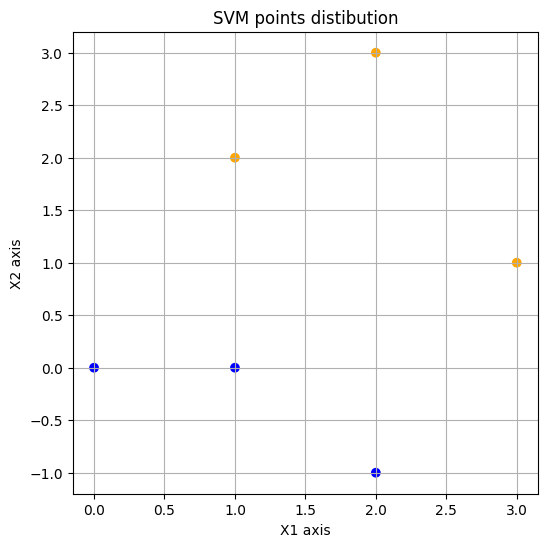

In [101]:
color = np.where(points.label==1, 'orange', 'blue') # conditional color assignment

plt.figure(figsize=(6,6))
plt.scatter(points[['x1']], points[['x2']], c=color)
plt.title('SVM points distibution')
plt.xlabel('X1 axis')
plt.ylabel('X2 axis')
plt.grid()
plt.show()

#### Sub-task 1.1 
As we can cleary see, the points are indeed separated into 2 distinct clusters

#### Sub-task 1.2
Linearly separable classification refers to a problem in which data points from two classes can be separated by a hyperplane (according to Euclidean algebra) in the feature space. 

In simpler terms, for a binary classification problem, if there exists a linear decision boundary that can perfectly classify all the data points, the data is considered linearly separable.

The complexity of a classification problem is often correlated with its degree of linear separability. Problems that are linearly separable are generally easier to solve than those that are not. 

Most of the times in real world scenarios, however, we would often work with linearly non-separable datasets, and we will have to use techniques like slack variables, mapping the data into a higher-dimensional space, adding polynomial (non-linear) features.

#### Sub-task 1.3 
The classes are clearly linearly separable. By the graph, a line that connects points $[0,2]$ and $[3,0]$ would separate these classes well.

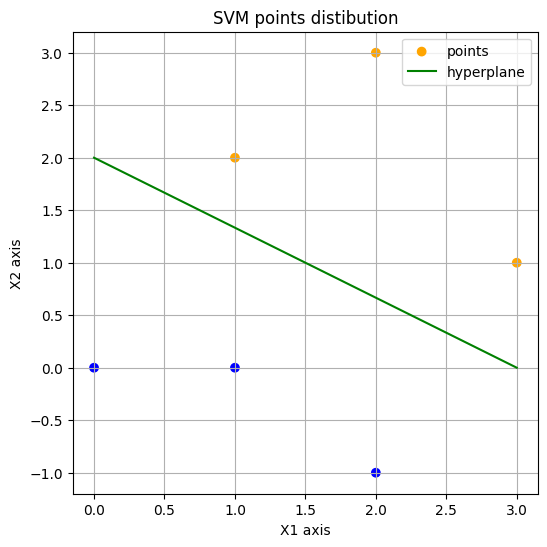

In [102]:
plt.figure(figsize=(6,6))
plt.scatter(points[['x1']], points[['x2']], c=color, label='points')
# .plot - used to plot the hyperplane
plt.plot([0,3], [2,0], c = 'green', label='hyperplane') # first - all x1, then all x2
plt.title('SVM points distibution')
plt.xlabel('X1 axis')
plt.ylabel('X2 axis')
plt.legend()
plt.grid()
plt.show()

#### Sub-task 1.4 
In the context of a decision boundary, a margin is the distance between decision points and the decision boundary - the line that separates the classes in the feaute space.

Our main goal is to optimize the margin to be the maximum possible value to find an **optimal hyperplane or decision boundary that maximally separates data points of different classes in a feature space**.

#### Sub-task 1.5
The main purpose of maximizing the margin is
- **clearly separating data points** in the feature space into several distinct groups
- ensuring the model **generalizes accurately** to new data as well as current data

A larger margin between the classes implies that the decision boundary is further from the closest data points of each class, which can reduce the risk of overfitting and improve the model's performance on unseen data.

A **low margin** can lead to a model that is overly sensitive to the training data, potentially resulting in **overfitting.** As a result, the model would perform poorly on new datam adn will be sensitive to noise in training data and will basiaclly memorize it.

### Task 2
#### Sub-task 2.1 
For point $x_1$
$$
\begin{gather*}
y_i(\beta^Tx_i+\beta_0) \ge 1 \\
1( 
\begin{bmatrix}\beta_1 \\ \beta_2 \end{bmatrix} [2,3] + \beta_0) \ge 1
\end{gather*}
\\
2\beta_1 + 3\beta_2+\beta_0 \ge 1
$$

For point $x_2$
$$
\begin{gather*}
y_i(\beta^Tx_i+\beta_0) \ge 1 \\
1( 
\begin{bmatrix}\beta_1 \\ \beta_2 \end{bmatrix} [1,2] + \beta_0) \ge 1
\end{gather*}
\\
\beta_1 + 2\beta_2+\beta_0 \ge 1
$$

For point $x_3$
$$
\begin{gather*}
y_i(\beta^Tx_i+\beta_0) \ge 1 \\
1( 
\begin{bmatrix}\beta_1 \\ \beta_2 \end{bmatrix} [3,1] + \beta_0) \ge 1
\end{gather*}
\\
3\beta_1 + 1\beta_2+\beta_0 \ge 1
$$

For point $x_4$
$$
\begin{gather*}
y_i(\beta^Tx_i+\beta_0) \ge 1 \\
-1( 
\begin{bmatrix}\beta_1 \\ \beta_2 \end{bmatrix} [1,0] + \beta_0) \ge 1
\end{gather*}
\\
-\beta_1-\beta_0 \ge 1
$$

For point $x_5$
$$
\begin{gather*}
y_i(\beta^Tx_i+\beta_0) \ge 1 \\
-1( 
\begin{bmatrix}\beta_1 \\ \beta_2 \end{bmatrix} [2,-1] + \beta_0) \ge 1
\end{gather*}
\\
-2\beta_1 + \beta_2 - \beta_0 \ge 1
$$

For point $x_6$
$$
\begin{gather*}
y_i(\beta^Tx_i+\beta_0) \ge 1 \\
-1( 
\begin{bmatrix}\beta_1 \\ \beta_2 \end{bmatrix} [0,0] + \beta_0) \ge 1
\end{gather*}
\\
-\beta_0 \ge 1
$$
#### Sub-task 2.2
The constraint $y_i=+1$ and $y_i=−1$ ensures that for class $+1$
- correctly classified positive class points should be on or beyond one margin width away from the decision boundary. In simpler terms, if we plug the points inton the decision line equation, we will get a value $\ge 1$, which means the point will be positioned above the line
and for class $-1$
- correctly classified negative class points should be on or beyond one margin width away from the decision boundary.

#### Sub-task 2.3
We take $\beta = [1,-1]^T$ and $\beta_0=0$

For point $x_1$
$$
2\beta_1 + 3\beta_2+\beta_0 \ge 1 \\
2(1) + 3(-1) + 0 \ge 0 \\
-1 \ge 0 \text{ Not satisfied}
$$

For point $x_2$
$$
\beta_1 + 2\beta_2+\beta_0 \ge 1 \\ 
1 - 2 + 0 \ge 1 \\
-1 \ge 1 \text{ Not satisfied}
$$

For point $x_3$
$$
3\beta_1 + 1\beta_2+\beta_0 \ge 1 \\
3 - 1 + 0 \ge 1 \\
2 \ge 1 \text{ Satisfied}
$$

For point $x_4$
$$
-\beta_1-\beta_0 \ge 1 \\
- 1 - 0 \ge 1 \\
- 1 \ge 1 \text{ Not satisfied}
$$

For point $x_5$
$$
-2\beta_1 + \beta_2 - \beta_0 \ge 1 \\
- 2 - 1 - 0 \ge 1 \\
-3 \ge 1 \text{ Not satisfied}
$$

For point $x_6$
$$
-\beta_0 \ge 1 \\
-0 \ge 1 \text{ Not satisfied}
$$

The margin constraint is satisfied only for 1 observation


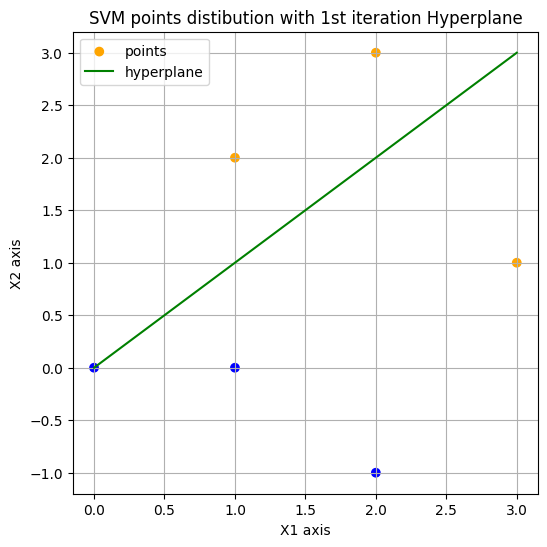

In [103]:
plt.figure(figsize=(6,6))
plt.scatter(points[['x1']], points[['x2']], c=color, label='points')
plt.plot([0,3], [0,3], c = 'green', label='hyperplane') # 
plt.title('SVM points distibution with 1st iteration Hyperplane')
plt.xlabel('X1 axis')
plt.ylabel('X2 axis')
plt.legend()
plt.grid()
plt.show()

#### Sub-task 2.4
We take $\beta = [2,2]^T$ and $\beta_0=-4$

For point $x_1$
$$
2\beta_1 + 3\beta_2+\beta_0 \ge 1 \\
2(2) + 3(2) + 0 \ge 0 \\
6 \ge 0 \text{ Satisfied}
$$

For point $x_2$
$$
\beta_1 + 2\beta_2+\beta_0 \ge 1 \\
2 + 4 - 4 \ge 1 \\
2 \ge 1 \text{ Satisfied}
$$

For point $x_3$
$$
3\beta_1 + 1\beta_2+\beta_0 \ge 1 \\
6 + 2 - 4 \ge 1 \\
4 \ge 1 \text{ Satisfied}
$$

For point $x_4$
$$
-\beta_1-\beta_0 \ge 1 \\
- 2 + 4 \ge 1 \\
2 \ge 1 \text{ Satisfied}
$$

For point $x_5$
$$
-2\beta_1 + \beta_2 - \beta_0 \ge 1 \\
- 4 + 2 + 4 \ge 1 \\
2 \ge 1 \text{ Satisfied}
$$

For point $x_6$
$$
-\beta_0 \ge 1 \\
4 \ge 1 \text{ Satisfied}
$$

The margin constraint is now satisfied by all of the points.
The margin's value is
$$
M = {1 \over {||\beta||}} = {1 \over {\sqrt{\beta_1^2+\beta_2^2}}} = {1 \over {\sqrt{2^2+2^2}}} = {1 \over {\sqrt{8}}} \approx 0.35
$$

From the calculationg of the margin constraint, we can clearly see that in each of the inequality we could replace the value on the right side by $2$, and all of the inequalities would still hold. This clearly indicates, **that there exists a bigger margin**, and the current margin is not maximized 

To visualize the line, we have to compute at least 2 of its points. We can do that by plugging in the values of $\beta$ and $\beta_0$ into the decision line equation
and then finding points that satisfy this equation
$$
\begin{gather*} 
x^T\beta + \beta_0 = 0 \\ 
[x_1, x_2]^T[2,2] - 4 = 0 \\
2x_1 + 2x_2 - 4 = 0 \\
x_1 + x_2 - 2 = 0 \\
x_2 = -x_1+2 \\
\end{gather*}
$$

Now, we have our equation and we can choose points $[0, 2]$ and $[3, -1]$ for our matplotlib line



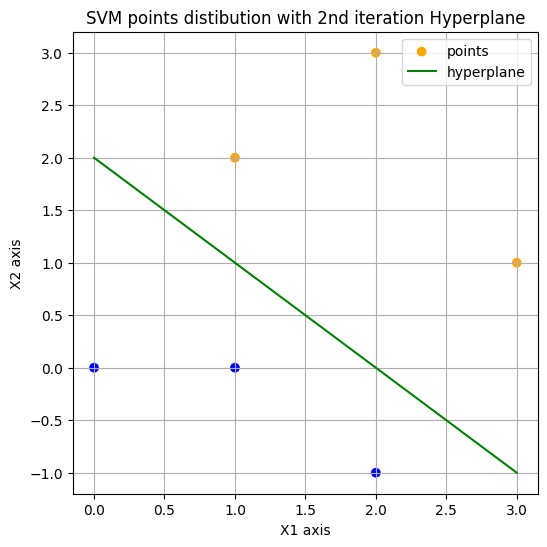

In [104]:
plt.figure(figsize=(6,6))
plt.scatter(points[['x1']], points[['x2']], c=color, label='points')
plt.plot([0,3], [2,-1], c = 'green', label='hyperplane') # 
plt.title('SVM points distibution with 2nd iteration Hyperplane')
plt.xlabel('X1 axis')
plt.ylabel('X2 axis')
plt.legend()
plt.grid()
plt.show()

#### Sub-task 2.5

In [105]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

X = np.array(points[['x1', 'x2']])
y = np.array(points[['label']]).flatten()

svc = SVC(kernel='linear') # create a linear SVC
svc.fit(X, y)

SVC(kernel='linear')

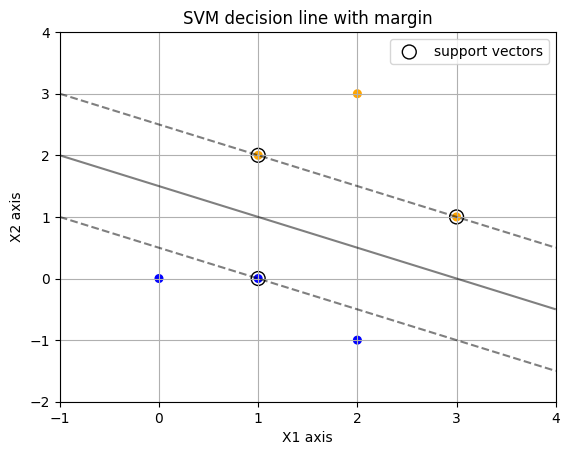

In [106]:
svm_colors = np.where(y == 1, 'orange', 'blue') # conditional color assignment

# plot the points
plt.scatter(X[:, 0], X[:, 1], c=svm_colors, s=30)

# plot the decision line 
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    svc, # our Support Vector Classifier
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)
# plot support vectors - vectors on the boundary of the margin of svm
ax.scatter(
    svc.support_vectors_[:, 0],
    svc.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    label='support vectors'
)
plt.legend()
plt.title('SVM decision line with margin')
plt.xlabel('X1 axis')
plt.ylabel('X2 axis')
plt.grid()
plt.show()

In [107]:
from IPython.display import display, Markdown 

beta = svc.coef_[0]
beta_0 = svc.intercept_[0]

margin = np.linalg.norm(beta)

equation = fr'''
#### Results
Equation of the hyperplane - decision line is  
$$
x^T\beta+\beta_0=0=x_1\beta_1+x_2\beta_2+\beta_0=0$$

If we plug in the values we found, we will get
$$
x_1{beta[0]:.2f}+x_2{beta[1]:.2f}+{beta_0:.2f}=0$$


The value of the margin is {margin:.3f}
'''

display(Markdown(equation))



#### Results
Equation of the hyperplane - decision line is  
$$
x^T\beta+\beta_0=0=x_1\beta_1+x_2\beta_2+\beta_0=0$$

If we plug in the values we found, we will get
$$
x_10.50+x_21.00+-1.50=0$$


The value of the margin is 1.118


In [108]:
print('Coefficients: ', beta)
print('Intercept: ', beta_0)
print('Margin: ', margin)

Coefficients:  [0.49984 0.99968]
Intercept:  -1.4994133333333337
Margin:  1.117676217873495



---

### **3. Slack Variables for a Soft-Margin**
In real-world datasets, perfect separation might not be possible as the data might be mixed. 

Lets add two new observations : 
- $ x_7 = [1, 3] $  with $y_7 = -1 $
- $ x_8 = [3, -2] $  with $y_8 = +1 $


Slack variables ($ \xi_i $ ) can be added to relax the SVM constraint for incorrectly classified or margin-violating points:

$$

y_i (\beta^T x_i + \beta_0) \geq 1 - \xi_i, \quad \xi_i \geq 0

$$


They are computed by the Hinge Loss function:

$$
\xi_i = \max(0, 1 - y_i (\beta^T x_i + \beta_0))
$$

- **3.1: Check for each observation if the point violates the soft-margin constraint. Compute the slack variable $ \xi_i $  for each point.**


- **3.2: What is the slack variable when the observation is well classified ?**

- **3.3: Identify the points that violate the margin.**

- **3.3: Compute the total violation:**

$$

\text{Total Slack:} \quad \sum_{i=1}^n \xi_i.

$$

---

### **4. Adding Slack Variables to the Objective Function**

The objective function that we used for the hard margin can be modified to include the penalty term for the slack variables. By doing so, our final problem is :

$$
 \text{minimize} \quad \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{n} \xi_i 
$$

subject to :

$$
 y_i (\beta \cdot x_i + b) \geq 1 - \xi_i \quad \forall i 
$$



$$
 \xi_i \geq 0 \quad \forall i 
$$

Where, 

1. $ \frac{1}{2} \|\beta\|^2 $ encourages a large margin by minimizing the norm of the weight vector.
2. $C \sum_{i=1}^{n} \xi_i$ penalizes the slack variables. $C$  is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
3. $ y_i (\beta \cdot x_i + b) \geq 1 - \xi_i $ : This constraint allows for some points to be within the margin or misclassified, thanks to the slack variable.
4. $ \xi_i \geq 0 $ : Ensures that slack variables are non-negative.

By adding slack variables to the objective function, the soft margin SVM can handle non-separable data more effectively, balancing the need for a large margin with the practical reality of misclassifications.

- **4. How does increasing or decreasing C affect the trade-off between maximizing the margin and minimizing classification errors ?**

---


### Task 3
#### Sub-task 3.1
Do the points violate the soft margin constraint $ y_i (\beta \cdot x_i + b) \geq 1 - \xi_i \quad \forall i $?. Let's check for each point 

For point $x_1$
$$
\begin{gather*}
\xi_1 = max(0, 1 - 1(\begin{bmatrix} 2 \\ 2 \end{bmatrix}[2,3] - 4)) = 0
\end{gather*}
$$

For point $x_2$
$$
\begin{gather*}
\xi_2 = max(0, 1 - 1(\begin{bmatrix} 2 \\ 2 \end{bmatrix}[1,2] - 4)) = 0
\end{gather*}
$$

For point $x_3$
$$
\begin{gather*}
\xi_3 = max(0, 1 - 1(\begin{bmatrix} 2 \\ 2 \end{bmatrix}[3,1] - 4)) = 0
\end{gather*}
$$

For point $x_4$
$$
\begin{gather*}
\xi_4 = max(0, 1 + 1(\begin{bmatrix}2 \\ 2 \end{bmatrix}[1,0] - 4)) = 0
\end{gather*}
$$

For point $x_5$
$$
\begin{gather*}
\xi_5 = max(0, 1 + 1(\begin{bmatrix}2 \\ 2 \end{bmatrix}[2,-1] - 4)) = 0
\end{gather*}
$$

For point $x_6$
$$
\begin{gather*}
\xi_6= max(0, 1 + 1(\begin{bmatrix}2 \\ 2 \end{bmatrix}[0,0] - 4)) = 0
\end{gather*}
$$

For point $x_7$
$$
\begin{gather*}
\xi_7 = max(0, 1 + 1(\begin{bmatrix}2 \\ 2 \end{bmatrix}[1, 3] - 4)) = 5
\end{gather*}
$$

For point $x_8$
$$
\begin{gather*}
\xi_8= max(0, 1 - 1(\begin{bmatrix}2 \\ 2 \end{bmatrix}[3,-2] - 4)) = 3
\end{gather*}
$$

Points **$x_7$ and $x_8$ are missclassified** because they do not satisfy the sofr margin constraint

#### Sub-task 3.2
The slack variable $\xi = 0$ when the observation is well classified, as we have seen with the initial 6 points.

#### Sub-task 3.3
The points that violate the margin are $x_7 = [1, 3]$  with $\xi_7 = 5$ and $ x_8 = [3, -2] $  with $\xi_8 = 3$

#### Sub-task 3.4
We will calculate the total slack using the formula below
$$
\text{Total Slack:} \quad \sum_{i=1}^n \xi_i.
$$

The total slack, then, will be:
$$
\begin{gather*}
\quad \sum_{i=1}^8 \xi_i. = \xi_1 + \xi_2 + \xi_3 + \xi_4 + \xi_5 + \xi_6 + \xi_7 + \xi_8 = \\
= 0 + 0 + 0 + 0 + 0 + 0 + 5 + 3 = 8
\end{gather*}
$$

The total slack is **8**


### Task 4
The parameter $C>0$ determines the trade-off between increasing the margin size and ensuring that the $x_i$ lie on the correct side of the margin 

Thus, for large values of $C$, it will behave similar to the hard-margin SVM, if the input data are linearly classifiable, but will still learn if a classification rule is viable or not.

Since $C$ is a part of the term $C \sum_{i=1}^{n} \xi_i$ that penalizes the $\xi_i$ slack variable. 
Therefore, if we **increase** the value of $C$, the SVC model would become more strict when it comes to mispredictions, and might yield a better accuracy, fewer misclassified points, and smaller slack variables, but with a lower margin. The model tries to classify all training points correctly. This might result in **overfitting**, as our models becomes very strict on train dataset.

If the value of $C$ is **small**, however, the tolerance for error would be higher (we would allow points inside the margin or even misclassified points), and we would eventually have a larger margin, but with a lower accuracy, larger slack variables. This might result in **underfitting**, as our model would not really learn much from the training data.

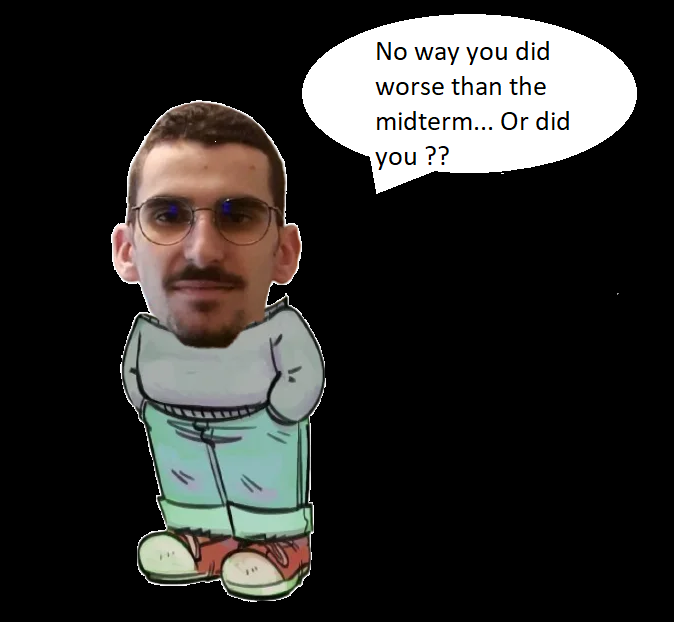